In [2]:
# Import block
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import distance
from sklearn.cluster import KMeans

# This is a file generated just for this lab 
import labseven

import random

In [3]:
# importing data
emails = pd.read_csv("emails.csv")
emails.set_index("Email No.")
emails_np = np.array(emails)
emails_np = emails_np[:, 2:]

In [4]:
#helper function
def classification_mse(class_truth, pred_class):
    indicators = np.zeros(len(class_truth))
    index = class_truth == pred_class
    indicators[index] = 0
    indicators[~index] = 1
    return np.mean(indicators)

# Introduction
This notebook will first explain at a high level what the k-nearest-neighbors algorithm is and how it works, then demonstrate an implementation using the sklearn module to classify emails as spam or not.

## Classification
kNN is a type of supervised classification. This means that we have a training dataset that includes some extra information about the observations besides the input variables. We often call this extra information "answers". In the example of spam emails, we have a collection of emails with data about them, and then the answers are extra row classifying them as spam or not spam. Having these answers means that this is _supervised machine learning_. The task of determining which group an entry should go into is _classification_. 

## Part 1: Exploring kNN with a Toy Example
Since the spam dataset contains over 3000 input variables and is therefore very hard to visualize, we will first walk through a simpler example of kNN classification that can be visualized in 2 dimensions.

In [5]:
# Start by importing data and examining it
mystery = np.loadtxt("lab7data.csv", delimiter = ",")

# What is the size of Mystery? How many data points? How many variables?
print(mystery.shape)
 
print(mystery[:5, :])

# We can see that there are two variables, 922 entries, and the data appears to be numeric

(922, 2)
[[-0.9473975   1.04076179]
 [-0.63358368  1.40893841]
 [-0.95407408  0.5264077 ]
 [-0.47016471  0.64175485]
 [-0.73512544  0.90445678]]


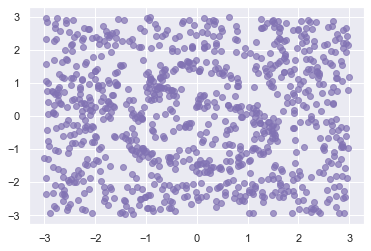

In [6]:
# Visualize the data
plt.scatter(mystery[:,0], mystery[:,1], c="m", alpha = 0.7)

For this example, take as a given that the data falls into two groups. We can try applying k-means with k=2 to identify these groups:

In [7]:
# Apply k-means (use the sklearn implementation)
alg = KMeans(2, init = 'random', random_state = 3, max_iter = 100)
fit = alg.fit(mystery)
clusters = fit.labels_

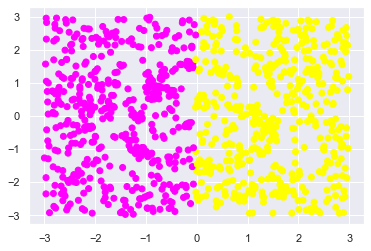

In [8]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=clusters, cmap = "spring")

### Adding a few labels
Up until now we have not had any answers for our data. In classification, we will often know the labels of a few datapoints. In this example, we have <font color='red'>red</font> points and <font color='blue'>blue</font> labels. 

Let's look at a few of these labeled points compared to the whole dataset.

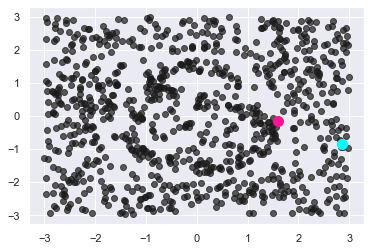

In [9]:
np.random.seed(2022)
# Gather one red and one blue point:

# LABSEVEN is a python file created for this notebook that 
#          has two functions: 
#          * RED_POINTS(num) extracts NUM red points 
#          * BLUE_POINTS(num) extracts NUM blue points
red = labseven.red_points(1)
blue = labseven.blue_points(1)

# Plot all the data
plt.scatter(mystery[:,0], mystery[:,1], c="k", alpha = 0.7)

# Plot the two labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

This may start to give an idea of what the two groups are, but with only two points it's hard to tell.

### Comparison to K-means
Recall that with k-means, we iterate between assigning clusters and adjusting each cluster's center. This iteration is required because we do not have any clear idea if we are "right" or not. In other words, we don't have the "true" group labels for each point; so we (iteratively) look for clusters, and once we have clusters, we then assign labels. Recall that in k-means, we don't even know the "right" number of clusters!

In this lab, we **_know_** that we have two groups and we **_know_** that we have a representative from each group. We can use this information to assign labels to the rest of the data **_without_** iterating between assigning clusters and updating group centers. We accomplish this by grouping points based on the closest labeled point to them:

In [10]:
# Assign each point in mystery to either "red" or "blue"

# Calculate the distance to Red for every point
red_dist = distance.cdist(mystery,red, "euclidean")

# Calculate the distance to Blue for every point
blue_dist = distance.cdist(mystery,blue, "euclidean")

In [11]:
# Figure out which is closer 
check_mat = np.hstack([red_dist,blue_dist])

labels = np.argmin(check_mat,axis=1) #remember argmin gives you the POSITION of the min value rather than the min itself
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

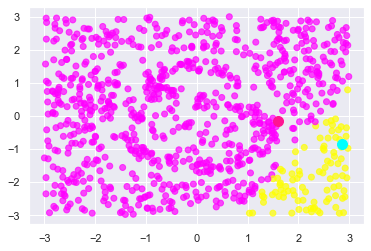

In [12]:
# Plot your resulting labels
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7, cmap = "spring")

# Plot your labeled points
plt.scatter(red[:,0], red[:,1], c="deeppink", s = 100)
plt.scatter(blue[:,0], blue[:,1], c="cyan", s = 100)

### Evaluating these results

Now we're starting to get somewhere! But is this the best we can do? Using one labeled point per group may not be representative.

## Adding More Labels
Now try using 5 of each red and blue points

In [13]:
# Gather five red points and five blue points:
red = labseven.red_points(5)
blue = labseven.blue_points(5)

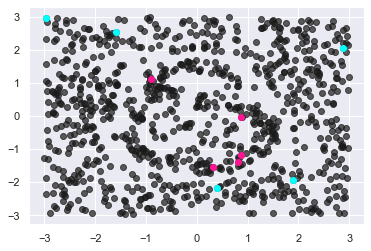

In [14]:
# Plot these labeled poitns against the whole dataset
plt.scatter(mystery[:,0], mystery[:,1], c="k", alpha = 0.7)
plt.scatter(red[:,0], red[:,1], c="deeppink")
plt.scatter(blue[:,0], blue[:,1], c="cyan")


Now let's try assigning each point to a group based on the color of the nearest point to it. We call this point the _nearest neighbor_

In [15]:
# Assign each point in mystery to either "red" or "blue"

# Calculate the distance to Red
red_dist = distance.cdist(mystery, red, "euclidean")

# Calculate the distance to Blue
blue_dist = distance.cdist(mystery, blue, "euclidean")

# Figure out which is closer

check_mat = np.hstack([red_dist,blue_dist])
labels_temp = np.argmin(check_mat, axis =1) # this gives you the point out of the red and blue points that it is closet to whether its red of blue

print(check_mat.shape)
print(labels_temp)

(922, 10)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2
 2 2 2 2 2 2 4 2 2 4 2 2 4 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2
 2 0 3 2 3 4 0 4 4 0 4 2 4 0 4 3 3 0 3 3 4 3 4 4 3 2 4 3 4 4 3 4 3 4 4 0 1
 3 3 4 4 0 0 3 3 4 3 1 3 3 4 4 0 3 3 0 4 4 3 4 4 4 4 3 4 3 4 3 4 4 3 4 0 1
 4 3 1 4 0 4 3 0 3 3 4 4 3 0 3 1 3 4 3 4 4 0 0 4 1 4 0 3 4 4 4 0 3 3 3 3 4
 3 4 3 3 4 3 2 4 3 3 4 3 0 2 1 4 3 3 0 2 4 4 0 4 3 0 3 3 0 3 3 4 4 3 1 3 0
 2 4 4 7 2 5 4 5 7 5 7 6 7 7 7 4 0 4 7 5 7 5 2 7 8 5 7 8 7 7 5 3 8 2 2 4 2
 8 3 2 7 7 2 2 5 7 4 2 2 8 2 2 5 5 2 5 3 4 8 7 9 8 2 7 7 2 8 6 2 8 5 5 9 7
 2 9 6 9 5 7 7 4 5 7 2 8 9 5 4 7 8 2 7 6 4 2 2 7 4 2 5 5 7 2 0 2 2 2 2 2 2
 7 3 4 7 8 6 3 4 8 8 2 9 8 3 9 2 6 2 9 7 8 8 7 2 8 8 4 7 4 9 5 4 6 5 5 2 4
 5 5 2 5 7 2 9 8 2 8 2 2 7 2 0 5 4 5 4 5 5 8 2 2 2 7 4 3 5 2 8 5 1 8 9 7 7
 7 2 9 2 3 3 9 5 5 7 3 8 2 4 2 4 8 5 8 2 4 2 9 2 9 7 4 9 7 2 5 6 5 5 2 5 2
 2 5 7 7 2 3 6 8 5 7 5 2 2 8 7 2 2 7 7 9 2 5 5 5 2 5 0 3 4 9 2 9 6 5 2 7 5
 2 4 9 8 3 2 3 

In [16]:
# Note how this case is slightly different: 
#   We have 10 possible columns in check_mat instead of just two
#   We can use an index trick to sort points into two categories
#   Based on if they are closest to one of the first 5 poitns (red)
#   or the second 5 points (blue)
labels = np.zeros([922,1])
inds = labels_temp[:] >= 5
labels[inds] = 1
labels

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

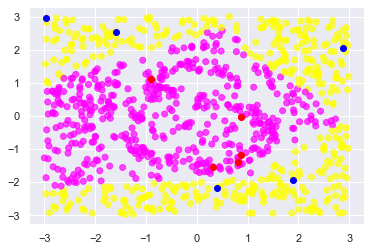

In [17]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7, cmap= "spring")

# Plot labeled points
plt.scatter(red[:,0], red[:,1], c="red")
plt.scatter(blue[:,0], blue[:,1], c="blue")

This is the result of classifying based on the single closest point. What if instead we classified based on the 3 nearest neighbors? Consider the following collections of three nearest neighbors:
* {<font color='blue'>blue</font>, <font color='blue'>blue</font>, <font color='blue'>blue</font>} : classify as blue
* {<font color='blue'>blue</font>, <font color='blue'>blue</font>, <font color='red'>red</font>}: classify as blue
* {<font color='blue'>blue</font>, <font color='red'>red</font>, <font color='red'>red</font>}: classify as red
* {<font color='red'>red</font>, <font color='red'>red</font>, <font color='red'>red</font>}: classify as red

Consider what would happen with an even number nearest neighbors... it would be possible to get a tie. 

In [18]:
# Assign each point in mystery to either "red" or "blue"
#        based on three neighbors

# Calculate the distance to Red
red_dist = distance.cdist(mystery, red, "euclidean")

# Calculate the distance to Blue
blue_dist = distance.cdist(mystery, blue, "euclidean")



In [19]:
# Figure out which three points are closest
check_mat = np.hstack([red_dist,blue_dist])
#print(check_mat)

# Using argsort, figure out which three are closest: 
closest_points = np.argsort(check_mat,axis = 1)
print(closest_points)

threeNN = closest_points[:,:3]

[[2 9 4 ... 5 7 8]
 [2 9 4 ... 7 5 8]
 [2 4 9 ... 6 8 7]
 ...
 [5 3 1 ... 9 7 6]
 [8 1 0 ... 7 9 6]
 [8 0 1 ... 2 9 6]]


In [20]:
# Start with a zero matrix the same size as threeNN
n_rows = mystery.shape[0]
binary_3NN = np.zeros([n_rows,3])

In [21]:
binary_3NN.shape

(922, 3)

In [22]:
# Use the index trick to find those closest to blue points
inds = threeNN > 4

# Place a 1 when a blue point is a nearest neighbor
binary_3NN[inds] = 1
print(binary_3NN)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [23]:
# Use sum + index trick to tell 
#     you which points are closer to more blue points

labels_temp = np.sum(binary_3NN, axis = 1)

labels = labels_temp > 1
labels

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

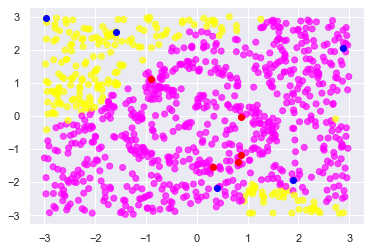

In [24]:
# Plot your results
plt.scatter(mystery[:,0], mystery[:,1], c=labels, alpha = 0.7, cmap="spring")

# Plot labeled points
plt.scatter(red[:,0], red[:,1], c="red")
plt.scatter(blue[:,0], blue[:,1], c="blue")

### Wrapping Up

This final classification is not perfect, but it allows us to understand the potential of kNN as an effective way to classify groups, and the basic structure of the function. With this understanding, let's now look at an application of kNN to a larger data-set for spam email filtering.

## Part 2: Applying kNN to email classification

A common use of kNN in the real world is in the task of filtering spam emails. One method for filtering is to check emails for certain common words used in spam emails, and reject emails based on the similarity of the word choices to spam emails. We will examine a dataset consisting of emails both normal and spam. The input variables for each email are the count of over 3000 common words that appear in emails. We can use this data to train a kNN classifier to group emails based on the count of certain words that they contain.

In [25]:
training_index = random.choices(range(len(emails_np)), k = 4500)
training_np = emails_np[training_index, :]

testing_index = list(set(range(len(emails_np)))-set(training_index))
testing_np = emails_np[testing_index, :]

In [26]:
training_np= training_np.astype(int)

In [28]:
kNN_alg = KNeighborsClassifier(n_neighbors=7)
kNN_alg.fit(training_np[:, 2:-1], training_np[:, -1])

KNeighborsClassifier(n_neighbors=7)

In [48]:
predictions = kNN_alg.predict(testing_np[:, 2:-1])

In [49]:
# Let's check the accuracy of the classifier on the test data...
print(classification_mse(testing_np[:, -1], predictions))


0.1510204081632653


Hooray! We have a classifier for spam that is accurate 85% of the time! Is this the best spam classifier? no! but it's a great start

TODO: should I implement cross val? try taking out some variables?